# Q1)

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [3]:
df= pd.read_csv("Company_Data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
df['Sales_Efficiency'] = df.Sales.map(lambda x: 'High' if x>8 else 'Low')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Efficiency
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [7]:
df1= pd.get_dummies(df,columns=['ShelveLoc','Urban','US'])
df1.head()


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Sales_Efficiency,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,High,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,High,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,High,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,Low,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,Low,1,0,0,0,1,1,0


In [8]:

feature_cols=['CompPrice','Income','Advertising','Population','Price','Education','ShelveLoc_Bad','ShelveLoc_Good','ShelveLoc_Medium','Urban_No','Urban_Yes','US_No','US_Yes']

In [9]:
X = df1[feature_cols]
Y = df1['Sales_Efficiency']

In [10]:
Y.value_counts()

Low     236
High    164
Name: Sales_Efficiency, dtype: int64

In [13]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.2,random_state=42)

In [14]:
#Building Decision Tree Classifier using Entropy Criteria

In [15]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [18]:
model.get_n_leaves()

22

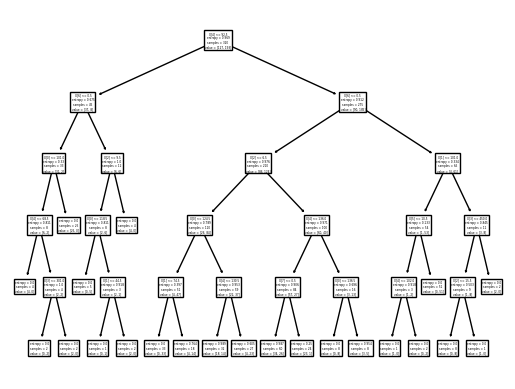

In [17]:
#PLot the decision tree
tree.plot_tree(model);

In [19]:
preds = model.predict(X_test) # predicting on test data set 

In [20]:
pd.Series(preds).value_counts() # getting the count of each category 

High    48
Low     32
dtype: int64

In [21]:
preds

array(['High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'High',
       'Low', 'High', 'High', 'High', 'Low', 'High', 'High', 'Low',
       'High', 'High', 'High', 'High', 'Low', 'Low', 'Low', 'Low', 'High',
       'High', 'Low', 'High', 'Low', 'High', 'High', 'Low', 'Low', 'High',
       'High', 'Low', 'High', 'High', 'Low', 'Low', 'Low', 'High', 'High',
       'Low', 'High', 'Low', 'High', 'Low', 'High', 'High', 'Low', 'Low',
       'High', 'High', 'Low', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'Low', 'High', 'High', 'High', 'Low', 'Low',
       'High', 'Low', 'High', 'High', 'Low', 'High', 'High', 'High',
       'High', 'Low', 'Low'], dtype=object)

In [22]:
pd.crosstab(Y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,High,Low
Sales_Efficiency,,
High,31,6
Low,17,26


In [23]:
Y_test.value_counts()

Low     43
High    37
Name: Sales_Efficiency, dtype: int64

In [24]:
# Accuracy 
np.mean(preds==Y_test)

0.7125

In [25]:
model.score(X_train,Y_train)

0.8375

In [26]:
from sklearn.metrics import accuracy_score#importing metrics for accuracy calculation (confusion matrix)
print("Accuracy", accuracy_score(Y_test,preds)*100)

Accuracy 71.25


In [27]:
print(classification_report(preds,Y_test))

              precision    recall  f1-score   support

        High       0.84      0.65      0.73        48
         Low       0.60      0.81      0.69        32

    accuracy                           0.71        80
   macro avg       0.72      0.73      0.71        80
weighted avg       0.74      0.71      0.71        80



In [28]:
#Building Decision Tree Classifier (CART) using Gini Criteria

from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=6)

In [29]:
model_gini.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=6)

In [30]:
#prediction and computing the accuracy
pred=model.predict(X_test)
np.mean(preds==Y_test)


0.7125

In [31]:
from sklearn.metrics import accuracy_score#importing metrics for accuracy calculation (confusion matrix)
print("Accuracy", accuracy_score(Y_test,preds)*100)

Accuracy 71.25


# Q2)

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing

In [34]:
data = pd.read_csv('Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [36]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [37]:
label_encoder = preprocessing.LabelEncoder()

In [38]:
data['Undergrad'] = label_encoder.fit_transform(data['Undergrad'])
data['Marital.Status'] = label_encoder.fit_transform(data['Marital.Status'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital.Status   600 non-null    int32
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int32
dtypes: int32(3), int64(3)
memory usage: 21.2 KB


In [39]:
data.rename(columns = {'Marital.Status' : 'mar_status', 'Taxable.Income': 'tax_inc', 'City.Population': 'city_pl',
                    'Work.Experience': 'work_exp'}, inplace= True)

In [40]:
data['status'] = data['tax_inc'].apply(lambda tax_inc: 'Risky' if tax_inc <= 30000 else 'Good')

In [41]:
data.head()

,Undergrad,mar_status,tax_inc,city_pl,work_exp,Urban,status
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good


In [42]:
data.drop(['tax_inc'], axis=1, inplace=True)

In [43]:
data['status'] = label_encoder.fit_transform(data['status'])

In [44]:
x = data.iloc[:,0:5]
y = data['status']

In [45]:
x

,Undergrad,mar_status,city_pl,work_exp,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [46]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: status, Length: 600, dtype: int32

In [47]:
y.value_counts()

0    476
1    124
Name: status, dtype: int64

In [48]:
#Splitting data into training and test data set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=40)

In [49]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

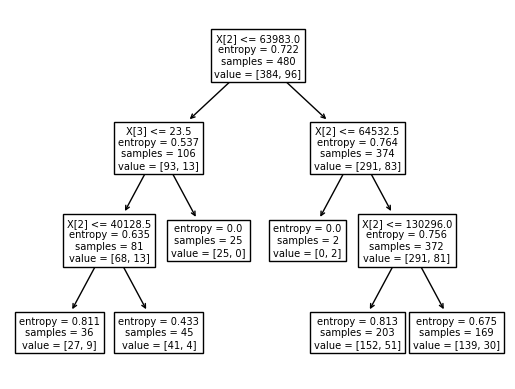

In [51]:
#Plot the Decision tree
tree.plot_tree(model);

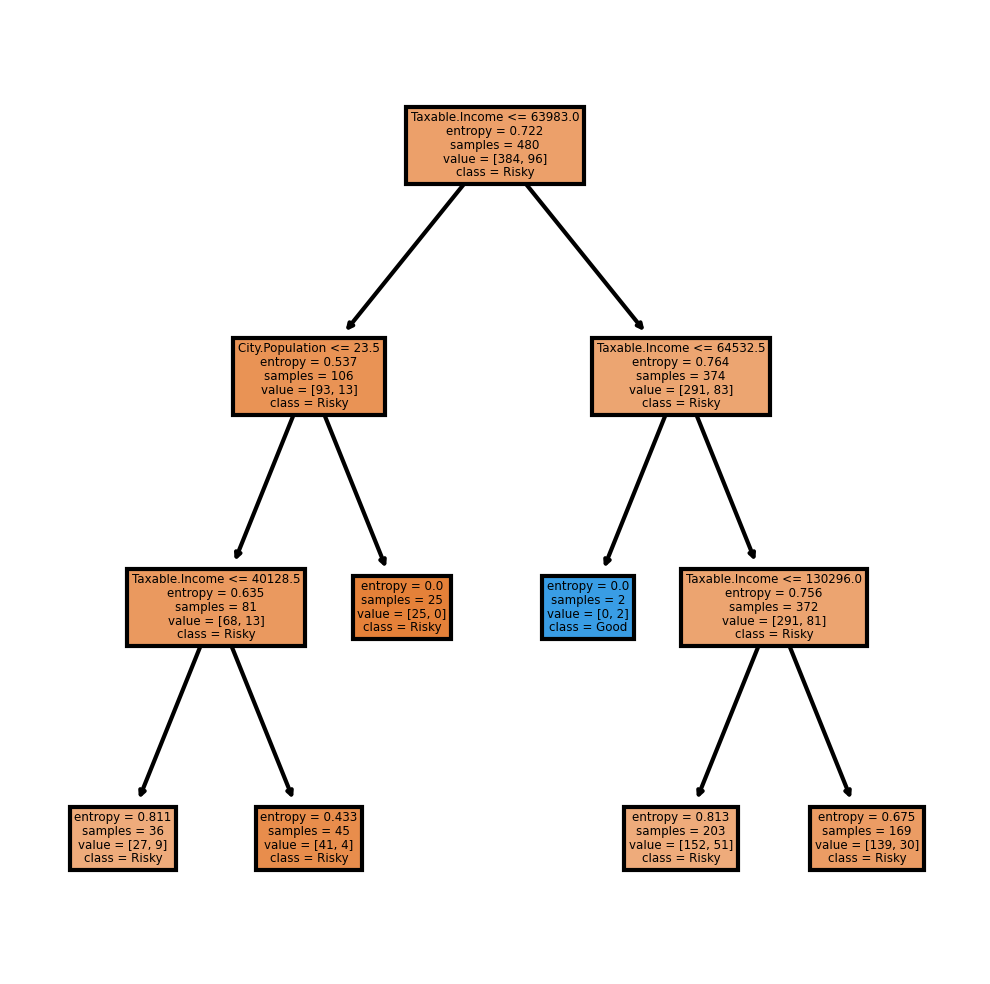

In [52]:
fn = ['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population', 'Work.Experiance', 'Urban']
cn = ['Risky', 'Good']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize= (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names = cn,
               filled = True);

In [53]:
model.get_n_leaves()

6

In [54]:
#Predicting on test data
preds = model.predict(x_test)
pd.Series(preds).value_counts()

0    120
dtype: int64

In [55]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [56]:
x_test


,Undergrad,mar_status,city_pl,work_exp,Urban
159,1,2,28504,1,0
307,0,0,31819,25,0
253,1,2,77256,29,0
528,0,1,172612,10,0
137,1,2,115884,6,0
...,...,...,...,...,...
102,1,0,91488,23,0
577,1,1,52940,5,1
18,1,0,59269,6,0
560,0,0,182562,24,0


In [57]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0
status,
0,92
1,28


In [58]:
# Accuracy 
np.mean(preds==y_test)

0.7666666666666667

In [59]:
from sklearn.metrics import classification_report
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87       120
           1       0.00      0.00      0.00         0

    accuracy                           0.77       120
   macro avg       0.50      0.38      0.43       120
weighted avg       1.00      0.77      0.87       120



C:\Users\Jiban\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jiban\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jiban\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [61]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [63]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.7666666666666667

In [64]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [65]:
array = data.values
X = array[:,0:3]
y = array[:,3]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [67]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [68]:
#Find the accuracy
model.score(X_test,y_test)

-0.9399003178407652